In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv(r"D:\assignment qns\3.SVM\mushroom.csv")
data.head(4)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692


In [3]:
data.drop(columns = ['Unnamed: 0'], inplace =True)

In [4]:
data.head(3)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884


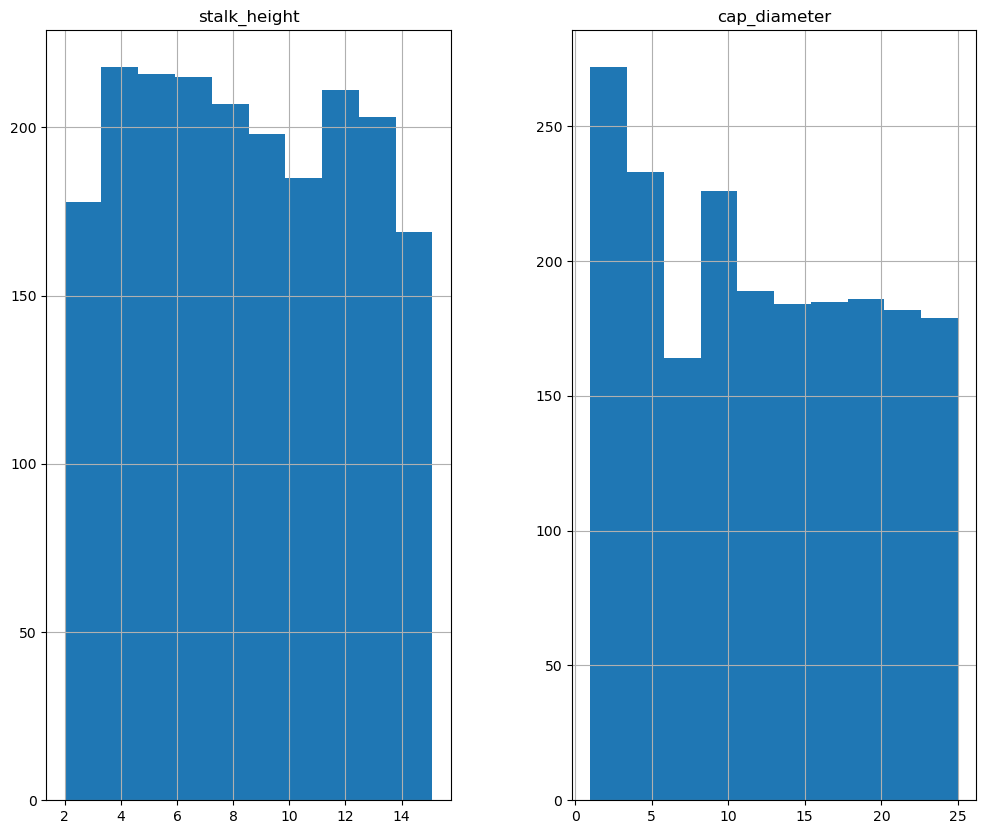

In [5]:
import matplotlib.pyplot as plt 
data.hist(figsize = (12,10))
plt.show()

In [6]:
correlation_matrix = data.corr()
correlation_matrix

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_8528\3337139685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

In [9]:
#split  the dataset inti training and testing sets :
X = data.drop('class', axis  = 1)
y = data['class']

In [10]:
X_train, X_test , y_train, y_test = train_test_split (X, y ,test_size = 0.2, random_state = 42)

svm implementation

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
svm = SVC()
svm.fit(X_train, y_train )

SVC()

In [13]:
#evalutae the model :
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Precision :', precision)
print('recall :', recall)
print('f1 score :', f1)

Accuracy:  0.6675
Precision : 0.6675
recall : 1.0
f1 score : 0.800599700149925


In [14]:
data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

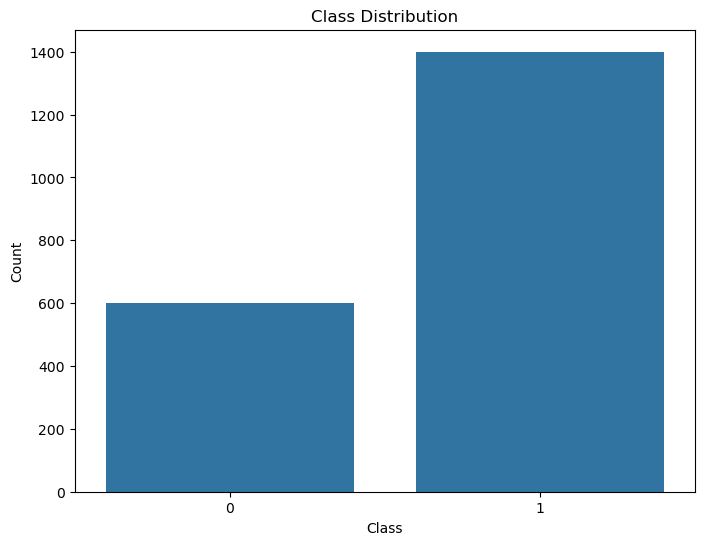

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
# Step 1: Train SVM models with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', random_state=42)
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Step 2: Evaluate performance of SVM models
linear_accuracy = svm_linear.score(X_test, y_test)
poly_accuracy = svm_poly.score(X_test, y_test)
rbf_accuracy = svm_rbf.score(X_test, y_test)

print("Accuracy with Linear Kernel:", linear_accuracy)
print("Accuracy with Polynomial Kernel:", poly_accuracy)
print("Accuracy with RBF Kernel:", rbf_accuracy)

Accuracy with Linear Kernel: 0.6675
Accuracy with Polynomial Kernel: 0.6675
Accuracy with RBF Kernel: 0.6675
